### Optimal number of clusters: Silhouette

- Dataset: BaskinRobbins dataset
- Learning Date: 18-Sep-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

In [1]:
# import liraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# load BaskinRobins dataset to a dataframe
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.csv'
df = pd.read_csv(url)
df.head(3)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB


### Scikit-learn: KMeans Clustering

1. Scale data
2. Optimal number of clusters
    - A. Silhouette analysis
        - a. visualize silhouette
    - B. Elbow method
3. Compute and name clusters

In [4]:
# import libraries

from sklearn import preprocessing
from sklearn.cluster import KMeans

#### 1. Scale data

In [5]:
df.head(3)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0


In [6]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [7]:
cols = ['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

In [8]:
len(cols)

6

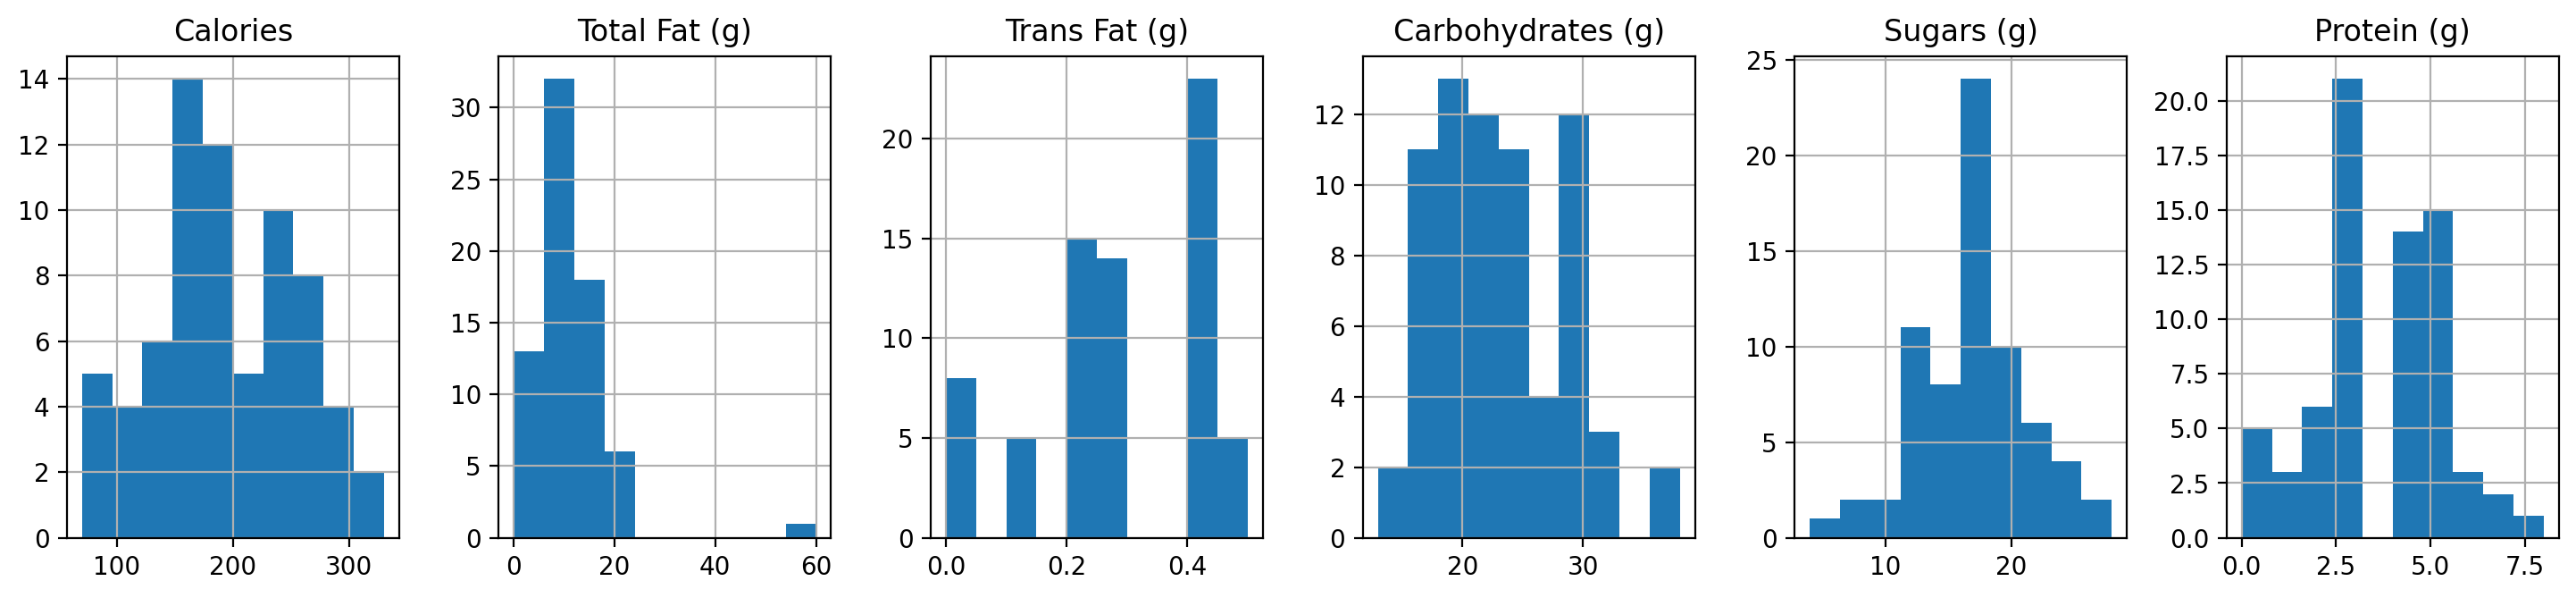

In [9]:
df[cols].hist(layout = (1, len(cols)), figsize = (3*len(cols), 3.5));

In [10]:
## z-score
# scaler = preprocessing.StandardScaler() # create StandardScaler instance

# power transform
scaler = preprocessing.PowerTransformer(standardize = True)

scaler

PowerTransformer()

In [11]:
S = scaler.fit_transform(df[cols]) # transform data
S

array([[-0.49981634, -0.19140601, -0.64396146, -0.4474016 , -0.21905077,
        -0.94318149],
       [-0.49981634, -0.03972367, -0.64396146, -0.67227346, -0.88364416,
        -0.34646195],
       [-0.33434815, -0.03972367,  0.04605887, -0.23526106, -0.44209212,
        -0.34646195],
       [-1.17571347, -0.91999515, -1.22273763, -1.16630974, -0.21905077,
        -0.34646195],
       [-1.00440936, -1.41701632, -1.22273763,  0.67289162,  0.6864766 ,
        -0.94318149],
       [-0.66658198, -0.19140601,  0.04605887, -0.91133724, -0.66365259,
        -0.34646195],
       [-1.17571347, -0.71378638, -1.22273763, -0.23526106, -2.76920248,
        -0.34646195],
       [-0.33434815, -0.19140601, -0.64396146, -0.23526106,  0.00539329,
        -0.34646195],
       [ 0.15507549, -0.19140601, -0.64396146,  2.20293228, -2.16379808,
         0.85959791],
       [ 0.47619563,  0.23993775,  0.85765627,  0.67289162,  0.45821689,
         0.25476122],
       [-0.00697326,  0.23993775, -0.64396146, -0.

In [12]:
S[:5]

array([[-0.49981634, -0.19140601, -0.64396146, -0.4474016 , -0.21905077,
        -0.94318149],
       [-0.49981634, -0.03972367, -0.64396146, -0.67227346, -0.88364416,
        -0.34646195],
       [-0.33434815, -0.03972367,  0.04605887, -0.23526106, -0.44209212,
        -0.34646195],
       [-1.17571347, -0.91999515, -1.22273763, -1.16630974, -0.21905077,
        -0.34646195],
       [-1.00440936, -1.41701632, -1.22273763,  0.67289162,  0.6864766 ,
        -0.94318149]])

In [13]:
S[:5].round(4) # 2D numpy array

array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])

In [14]:
# get X and y data from S numpy array to a dataframe

X = pd.DataFrame(S, columns = cols) # z-score
X.head(3)

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462


In [15]:
X.shape

(70, 6)

array([[<AxesSubplot: title={'center': 'Calories'}>,
        <AxesSubplot: title={'center': 'Total Fat (g)'}>,
        <AxesSubplot: title={'center': 'Trans Fat (g)'}>,
        <AxesSubplot: title={'center': 'Carbohydrates (g)'}>,
        <AxesSubplot: title={'center': 'Sugars (g)'}>,
        <AxesSubplot: title={'center': 'Protein (g)'}>]], dtype=object)

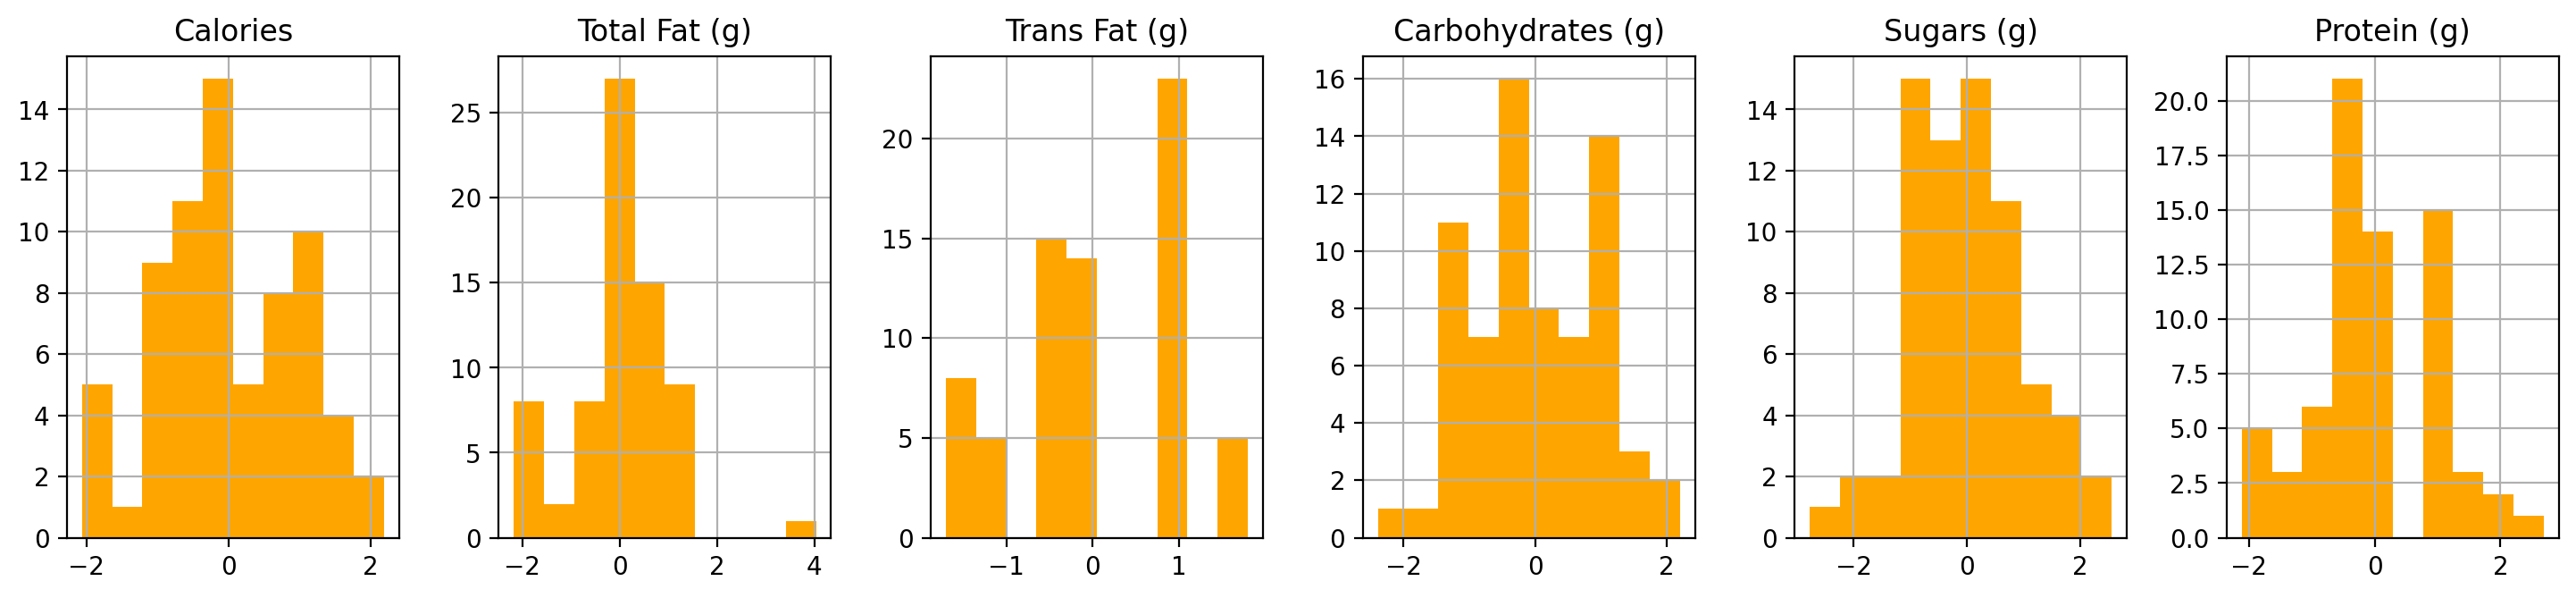

In [16]:
X[cols].hist(layout = (1, len(cols)), figsize = (3*len(cols), 3.5), color = 'orange')